## Comic Book Gender Representation Analysis

In this project, I will analyze gender representation in comic books using a dataset provided by **FiveThirtyEight**. The dataset contains detailed information about superheroes and villains from two major comic book publishers in the US: **DC** and **Marvel**.

Key objectives:
- **Data Import and Combination**: Import separate datasets for DC and Marvel characters and combine them into a single dataframe for analysis.
- **Gender Representation Analysis**: Explore gender representation in comic books and examine trends across the two publishers.
- **Data Visualization**: Use visualizations to highlight patterns and differences in gender portrayal between superheroes and villains in both publishers.

This analysis aims to provide insights into how gender is represented in the comic book industry and whether significant differences exist between DC and Marvel.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url_dc = "https://raw.githubusercontent.com/fivethirtyeight/data/master/comic-characters/dc-wikia-data.csv"
url_marvel = "https://raw.githubusercontent.com/fivethirtyeight/data/master/comic-characters/marvel-wikia-data.csv"

In [4]:
dc_data = pd.read_csv(url_dc)
marvel_data = pd.read_csv(url_marvel)

In [5]:
data_all = pd.concat([dc_data, marvel_data])

In [6]:
data_all.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,Year
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0,NaN
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0,NaN
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0,NaN
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0,NaN
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0,NaN


### Data Inspection

Upon inspecting the dataset, several issues are apparent:
- Significant missing data in the **GSM**, **EYE**, and **HAIR** columns, making them less useful for analysis.
- The **ID** and **ALIGN** columns also contain substantial missing values.
- Column naming inconsistencies, such as **YEAR** and **Year**, have resulted in separate columns.
- Reliable columns include **page_id**, **name**, **urlslug**, and **ALIVE**, which have minimal or no missing data.

Addressing these issues will be essential for a clean and effective analysis.

In [8]:
data_all.tail()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,Year
16371,657508,Ru'ach (Earth-616),\/Ru%27ach_(Earth-616),No Dual Identity,Bad Characters,Green Eyes,No Hair,Male Characters,NaN,Living Characters,NaN,NaN,NaN,NaN
16372,665474,Thane (Thanos' son) (Earth-616),\/Thane_(Thanos%27_son)_(Earth-616),No Dual Identity,Good Characters,Blue Eyes,Bald,Male Characters,NaN,Living Characters,NaN,NaN,NaN,NaN
16373,695217,Tinkerer (Skrull) (Earth-616),\/Tinkerer_(Skrull)_(Earth-616),Secret Identity,Bad Characters,Black Eyes,Bald,Male Characters,NaN,Living Characters,NaN,NaN,NaN,NaN
16374,708811,TK421 (Spiderling) (Earth-616),\/TK421_(Spiderling)_(Earth-616),Secret Identity,Neutral Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN,NaN
16375,673702,Yologarch (Earth-616),\/Yologarch_(Earth-616),NaN,Bad Characters,NaN,NaN,NaN,NaN,Living Characters,NaN,NaN,NaN,NaN


In [9]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23272 entries, 0 to 16375
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           23272 non-null  int64  
 1   name              23272 non-null  object 
 2   urlslug           23272 non-null  object 
 3   ID                17489 non-null  object 
 4   ALIGN             19859 non-null  object 
 5   EYE               9877 non-null   object 
 6   HAIR              16734 non-null  object 
 7   SEX               22293 non-null  object 
 8   GSM               154 non-null    object 
 9   ALIVE             23266 non-null  object 
 10  APPEARANCES       21821 non-null  float64
 11  FIRST APPEARANCE  22388 non-null  object 
 12  YEAR              6827 non-null   float64
 13  Year              15561 non-null  float64
dtypes: float64(3), int64(1), object(10)
memory usage: 2.7+ MB


In [10]:
combined_nan_counts = data_all.isna().sum()
print(combined_nan_counts)

page_id                 0
name                    0
urlslug                 0
ID                   5783
ALIGN                3413
EYE                 13395
HAIR                 6538
SEX                   979
GSM                 23118
ALIVE                   6
APPEARANCES          1451
FIRST APPEARANCE      884
YEAR                16445
Year                 7711
dtype: int64


### Formulate a Question

How does the representation of different genders in terms of appearances in comic books differ between DC and Marvel comics?

This question is interesting because comic books are a significant part of global pop culture, influencing millions of readers. By understanding gender representation in these stories, we can uncover potential cultural trends and biases that may exist in such influential media.

### Data Analysis

To answer the question, I will apply data science techniques to analyze the dataset.

#### Initial Approach
I will first filter out any anomalous values in the dataset. Then, using descriptive statistics, I will explore the data to get a general sense of how gender representation varies between DC and Marvel comics.

In [12]:
valid_genders = ['Male Characters', 'Female Characters']
filtered_data = data_all[data_all['SEX'].isin(valid_genders)]

In [13]:
filtered_data = filtered_data.dropna(subset=['APPEARANCES'])

In [14]:
descriptive_stats = filtered_data.groupby('SEX')['APPEARANCES'].describe()
descriptive_stats

,count,mean,std,min,25%,50%,75%,max
SEX,,,,,,,,
Female Characters,5479.0,21.039606,77.363117,1.0,2.0,5.0,13.0,1713.0
Male Characters,15426.0,19.027097,101.382031,1.0,1.0,4.0,10.0,4043.0


Text(0, 0.5, 'Number of Appearances')

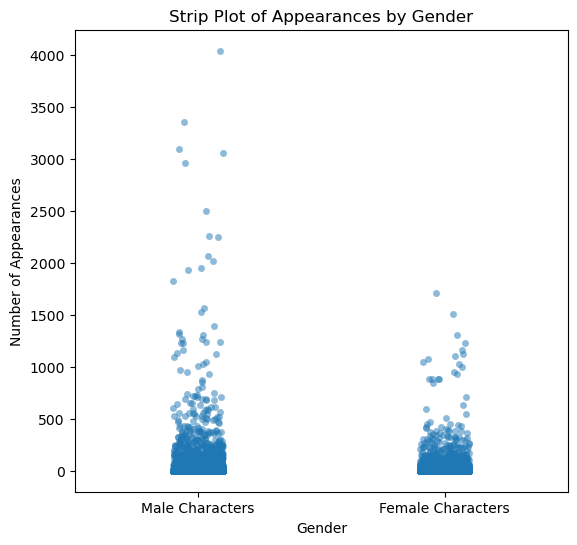

In [15]:
filtered_data = filtered_data.reset_index(drop=True)

plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 2)
sns.stripplot(data=filtered_data, x='SEX', y='APPEARANCES', jitter=True, alpha=0.5)
plt.title('Strip Plot of Appearances by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Appearances')

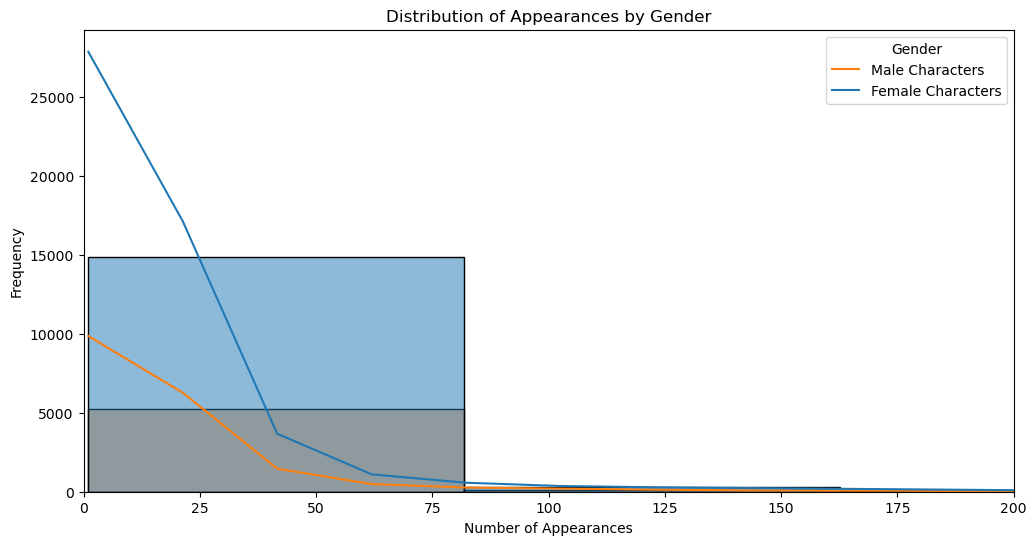

In [16]:
plt.figure(figsize=(12, 6))
sns.histplot(data=filtered_data, x='APPEARANCES', hue='SEX', bins=50, kde=True)
plt.title('Distribution of Appearances by Gender')
plt.xlabel('Number of Appearances')
plt.ylabel('Frequency')
plt.xlim(0, 200)
plt.legend(title='Gender', labels=['Male Characters', 'Female Characters'])
plt.show()

### Leveraging Statistics for Deeper Insights

To further explore the question, *How does the representation of different genders in terms of appearances in comic books differ between DC and Marvel comics?*, we can apply several statistical methods to gain deeper insights:

- **Probability Statistics**: We can use probability to identify trends and project how gender representation may evolve in the future.
- **Hypothesis Testing**: By comparing means between two groups (e.g., different periods or publishers), we can formulate a hypothesis and use statistical tests to evaluate differences in gender representation over time.

**Potential Challenges**:
- **Missing Data and Inconsistencies**: The presence of missing data may skew the results or limit the scope of analysis.
- **Non-Normal Distribution**: If the data is not normally distributed, statistical tests such as the t-test may not be appropriate, limiting our ability to compare means.

These considerations will guide how we approach the analysis and interpret the results.